In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import time
from sklearn.metrics import classification_report


In [55]:
column_names ="""\nword_freq_make:         continuous.
word_freq_address:      continuous.
word_freq_all:          continuous.
word_freq_3d:           continuous.
word_freq_our:          continuous.
word_freq_over:         continuous.
word_freq_remove:       continuous.
word_freq_internet:     continuous.
word_freq_order:        continuous.
word_freq_mail:         continuous.
word_freq_receive:      continuous.
word_freq_will:         continuous.
word_freq_people:       continuous.
word_freq_report:       continuous.
word_freq_addresses:    continuous.
word_freq_free:         continuous.
word_freq_business:     continuous.
word_freq_email:        continuous.
word_freq_you:          continuous.
word_freq_credit:       continuous.
word_freq_your:         continuous.
word_freq_font:         continuous.
word_freq_000:          continuous.
word_freq_money:        continuous.
word_freq_hp:           continuous.
word_freq_hpl:          continuous.
word_freq_george:       continuous.
word_freq_650:          continuous.
word_freq_lab:          continuous.
word_freq_labs:         continuous.
word_freq_telnet:       continuous.
word_freq_857:          continuous.
word_freq_data:         continuous.
word_freq_415:          continuous.
word_freq_85:           continuous.
word_freq_technology:   continuous.
word_freq_1999:         continuous.
word_freq_parts:        continuous.
word_freq_pm:           continuous.
word_freq_direct:       continuous.
word_freq_cs:           continuous.
word_freq_meeting:      continuous.
word_freq_original:     continuous.
word_freq_project:      continuous.
word_freq_re:           continuous.
word_freq_edu:          continuous.
word_freq_table:        continuous.
word_freq_conference:   continuous.
char_freq_;:            continuous.
char_freq_(:            continuous.
char_freq_[:            continuous.
char_freq_!:            continuous.
char_freq_$:            continuous.
char_freq_#:            continuous.
capital_run_length_average: continuous.
capital_run_length_longest: continuous.
capital_run_length_total:   continuous"""

names = []
for i in column_names.split("."): 
    v = i.split(":")[0][1:].split("_")[-1]
    names.append(v)
names.append("spam")
data = pd.DataFrame(pd.read_csv("./spambase./spambase.data",header=None))
data.columns = names 
data.head(3)

,make,address,all,3d,our,over,remove,internet,order,mail,...,;,(,[,!,$,#,average,longest,total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1


In [56]:
data.describe()

,make,address,all,3d,our,over,remove,internet,order,mail,...,;,(,[,!,$,#,average,longest,total,spam
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


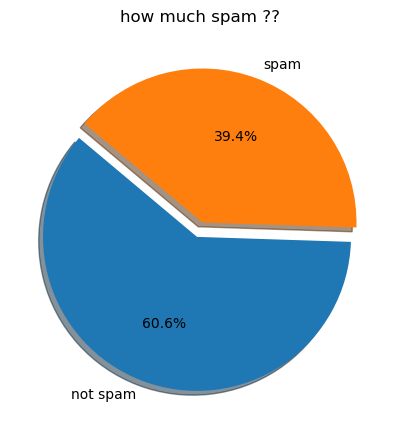

In [57]:

Y = (data[data.columns[-1]])
# Create a pie chart
plt.figure(figsize=(5,5))
plt.title("how much spam ?? ")
plt.pie(Y.value_counts(), explode=(0.1, 0), labels=["not spam","spam"],
                                   autopct='%1.1f%%', shadow=True, startangle=140)
plt.show()

In [58]:
correlations = data.corr()["spam"]
significant_correlations = correlations[abs(correlations)>= 0.15 ]
insignificant_correlations = correlations[abs(correlations)< 0.15 ]
len(insignificant_correlations)


31

In [59]:
insignificant_words = []
significant_words = []
for item in list(insignificant_correlations.index) : 
    insignificant_words.append(item.split("_")[-1])
for item in list(significant_correlations.index):
    significant_words.append(item.split("_")[-1])
print(significant_words)
print(insignificant_words)

['all', 'our', 'over', 'remove', 'internet', 'order', 'receive', 'addresses', 'free', 'business', 'email', 'you', 'credit', 'your', '000', 'money', 'hp', 'hpl', 'george', '650', 'labs', '1999', '!', '$', 'longest', 'total', 'spam']
['make', 'address', '3d', 'mail', 'will', 'people', 'report', 'font', 'lab', 'telnet', '857', 'data', '415', '85', 'technology', 'parts', 'pm', 'direct', 'cs', 'meeting', 'original', 'project', 're', 'edu', 'table', 'conference', ';', '(', '[', '#', 'average']


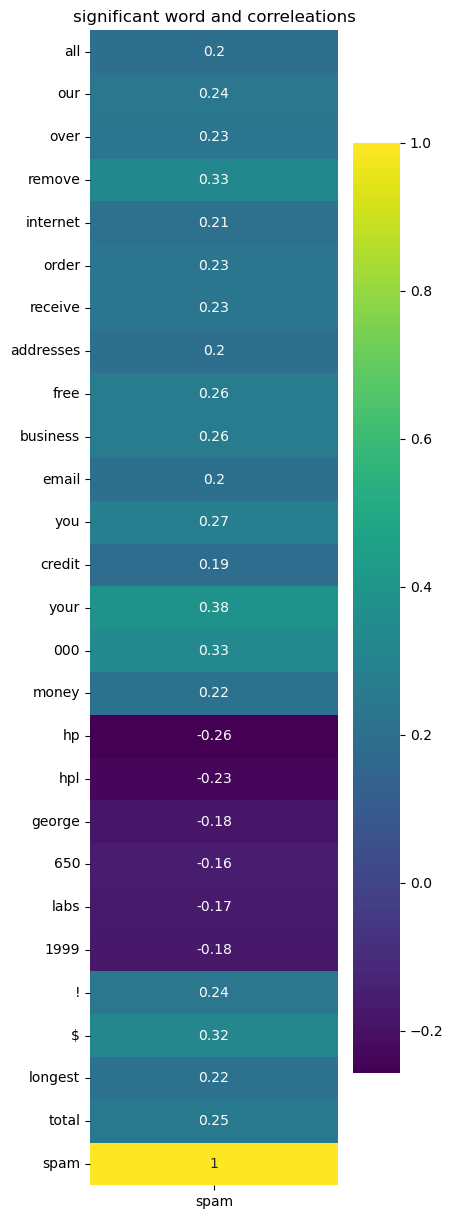

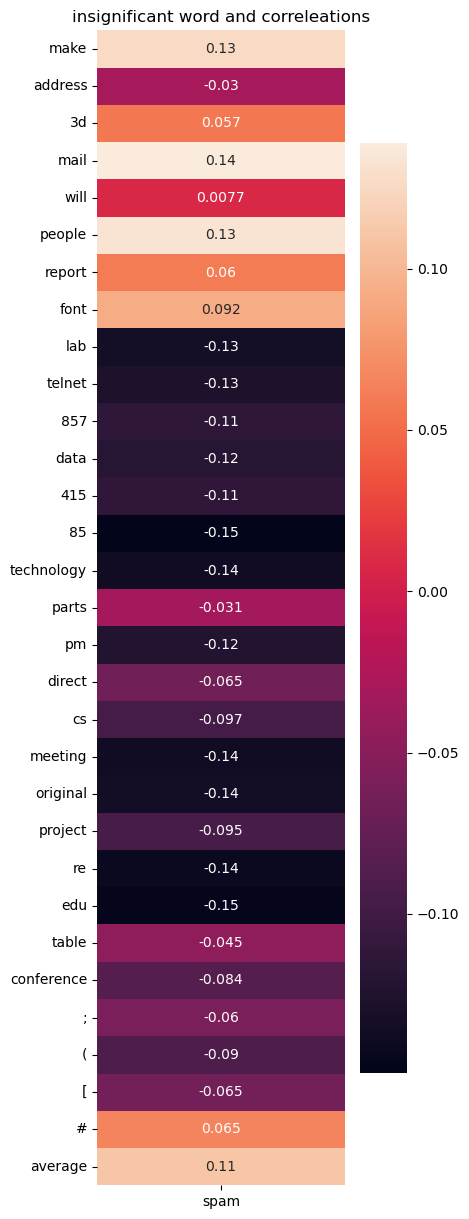

In [60]:
plt.figure(figsize=(4, 15))
sns.heatmap(pd.DataFrame(significant_correlations,columns=["spam"]),  annot= True, cmap="viridis")
plt.title("significant word and correleations")
plt.show()
plt.figure(figsize=(4, 15))
sns.heatmap(pd.DataFrame(insignificant_correlations,columns=["spam"]),  annot= True)
plt.title("insignificant word and correleations")
plt.show()

In [61]:
false_significant_words = ["you", "your", 'george','650','labs','1999',"money" ]

false_insignificant_words = ["address", "telnet", "technology", "original", "edu", "average", "font", "cs", "project", "table", "[","#"]
all_words = list(set(significant_words + (insignificant_words)))

In [62]:
fc = list(filter(lambda x: x not in false_significant_words, significant_words))
fc.extend(false_insignificant_words)

In [63]:
fc.remove("spam")

In [64]:
print("significant_words : ")
print(significant_words)
print("*"*300)
print("insignificant_words : ")
print(insignificant_words)
print("*"*300)
print("false_significant_words : ")
print(false_significant_words)
print("*"*300)
print("false_insignificant_words : ")
print(false_insignificant_words)
print("*"*300)
print("final_significant_words : ")
print(fc)
print("*"*300)


significant_words : 
['all', 'our', 'over', 'remove', 'internet', 'order', 'receive', 'addresses', 'free', 'business', 'email', 'you', 'credit', 'your', '000', 'money', 'hp', 'hpl', 'george', '650', 'labs', '1999', '!', '$', 'longest', 'total', 'spam']
************************************************************************************************************************************************************************************************************************************************************************************************************
insignificant_words : 
['make', 'address', '3d', 'mail', 'will', 'people', 'report', 'font', 'lab', 'telnet', '857', 'data', '415', '85', 'technology', 'parts', 'pm', 'direct', 'cs', 'meeting', 'original', 'project', 're', 'edu', 'table', 'conference', ';', '(', '[', '#', 'average']
******************************************************************************************************************************************************************

In [65]:
fc2 = ["average", "total", "longest"]
fc1 = list(filter(lambda x: x not in fc2, fc))

In [66]:
columns= list(filter(lambda x: x in fc1 or x in fc2 , fc))
columns.append("spam")
cleaned_data = data[columns]


In [67]:
cleaned_data

,all,our,over,remove,internet,order,receive,addresses,free,business,...,original,edu,average,font,cs,project,table,[,#,spam
0,0.64,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.32,0.00,...,0.00,0.00,3.756,0.0,0.0,0.00,0.0,0.0,0.000,1
1,0.50,0.14,0.28,0.21,0.07,0.00,0.21,0.14,0.14,0.07,...,0.00,0.00,5.114,0.0,0.0,0.00,0.0,0.0,0.048,1
2,0.71,1.23,0.19,0.19,0.12,0.64,0.38,1.75,0.06,0.06,...,0.12,0.06,9.821,0.0,0.0,0.00,0.0,0.0,0.010,1
3,0.00,0.63,0.00,0.31,0.63,0.31,0.31,0.00,0.31,0.00,...,0.00,0.00,3.537,0.0,0.0,0.00,0.0,0.0,0.000,1
4,0.00,0.63,0.00,0.31,0.63,0.31,0.31,0.00,0.31,0.00,...,0.00,0.00,3.537,0.0,0.0,0.00,0.0,0.0,0.000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.62,0.00,0.31,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.31,1.142,0.0,0.0,0.31,0.0,0.0,0.000,0
4597,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,2.00,1.555,0.0,0.0,0.00,0.0,0.0,0.000,0
4598,0.30,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,1.20,1.404,0.0,0.0,0.00,0.0,0.0,0.000,0
4599,0.00,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.32,1.147,0.0,0.0,0.32,0.0,0.0,0.000,0


In [68]:
cleaned_data.to_csv("./spambase/cleaned_data.csv")